# ⚛️ Phase-3.4: Quantum-Inspired Fusion
## Convert Evidence → Threat Probabilities

---

### 🎯 **Objective**

Apply quantum-inspired principles to convert accumulated evidence into threat probabilities. This conceptual mapping uses amplitude-based fusion (NOT real quantum computing) to model uncertainty and superposition of threat hypotheses.

### 🧬 **Quantum Concepts (Conceptual Only)**

1. **Amplitude**: Each attack type has an amplitude based on evidence strength
2. **Normalization**: Sum of squared amplitudes = 1.0 (probability distribution)
3. **Measurement**: Squaring amplitudes yields threat probabilities
4. **Superposition**: Multiple threats can coexist with different probabilities

**Key Principle**: No real quantum libraries - pure mathematical mapping for interpretability

---

## 📦 Setup and Imports

In [12]:
import sys
import numpy as np
from typing import Dict, List, Tuple
from dataclasses import dataclass
import matplotlib.pyplot as plt

# Import Phase-3.3 (Evidence Accumulation)
%run Phase_3_3_Evidence_Accumulation.ipynb

print("✅ Dependencies loaded")
print(f"   AttackEvidence: {AttackEvidence}")
print(f"   accumulate_evidence: {accumulate_evidence}")

✅ Libraries imported successfully
✅ FlowRecord dataclass defined
✅ AdaptiveTimeWindow class defined
Phase-3.1: Adaptive Time Window Implementation
✅ AdaptiveTimeWindow initialized
   Min window: 5.0s / 10 flows
   Max window: 30.0s / 100 flows
   Initial state: AdaptiveTimeWindow(flows=0, span=0.0s, state=empty)
✅ Phase-3.1 class implementation complete!
   Run validation notebook for comprehensive tests.
✅ Libraries imported successfully
Initializing ChromaDB Client
Project Root: c:\Users\suhas\OneDrive\Desktop\Capstone\RAG-IDS-Knowledge-Augmented-IoT-Threat-Detection
ChromaDB Path: c:\Users\suhas\OneDrive\Desktop\Capstone\RAG-IDS-Knowledge-Augmented-IoT-Threat-Detection\artifacts\chromadb
ChromaDB Collection Loaded
Collection: iot_behavioral_memory_hybrid
Total Vectors: 457,622
Metadata: {'clusters_per_bucket': 250, 'compression_ratio': 48.81544375051899, 'description': 'Hybrid Temporal + Local Clustering Curation (v3 - Panel-Safe)', 'temporal_buckets': 100, 'total_samples': 457622, 

---

## 🔧 Threat Hypothesis Schema

In [13]:
@dataclass
class ThreatHypothesis:
    """Quantum-inspired threat hypothesis with probability."""
    attack_type: str
    amplitude: float  # Raw amplitude before normalization
    probability: float  # Threat probability [0, 1] after measurement
    confidence: float  # Confidence level based on evidence quality
    evidence_count: int  # Number of supporting matches
    recurrence_score: float  # Temporal persistence
    system_entropy: float = 0.0  # Shannon entropy (system-wide confusion metric)
    
    def __repr__(self):
        return (f"ThreatHypothesis(type={self.attack_type}, "
                f"prob={self.probability:.4f}, conf={self.confidence:.4f})")

print("✅ ThreatHypothesis dataclass defined")

✅ ThreatHypothesis dataclass defined


## 🧮 Core Function: quantum_fusion()

Convert evidence summary to threat probabilities using quantum-inspired fusion.

In [14]:
def quantum_fusion(
    evidence_summary: Dict[str, AttackEvidence],
    temporal_decay: float = 0.9,
    min_evidence_threshold: int = 1
) -> Dict[str, ThreatHypothesis]:
    """
    Apply quantum-inspired fusion to convert evidence into threat probabilities.
    """
    
    # Filter evidence by threshold
    valid_evidence = {
        attack_type: ev 
        for attack_type, ev in evidence_summary.items()
        if ev.count >= min_evidence_threshold
    }
    
    # CASE 1: No threats detected -> Return "Normal" state
    if len(valid_evidence) == 0:
        return {
            'Normal': ThreatHypothesis(
                attack_type='Normal',
                amplitude=1.0,
                probability=1.0,
                confidence=1.0,
                evidence_count=0,
                recurrence_score=0.0
            )
        }
    
    # Step 1: Compute raw amplitudes
    amplitudes = {}
    
    for attack_type, evidence in valid_evidence.items():
        # Amplitude formula: sqrt(count * avg_similarity * recurrence)
        # This emphasizes both frequency (count) and quality (similarity, recurrence)
        raw_amplitude = np.sqrt(
            evidence.count * evidence.avg_similarity * evidence.recurrence_score
        )
        amplitudes[attack_type] = float(raw_amplitude)
    
    # Step 2: Normalize amplitudes (Born rule)
    # Ensure sum of squared amplitudes = 1.0
    sum_squared_amplitudes = sum(amp ** 2 for amp in amplitudes.values())
    
    # CASE 2: Edge case (all amplitudes zero) -> Return "Normal" state
    if sum_squared_amplitudes == 0:
        return {
            'Normal': ThreatHypothesis(
                attack_type='Normal',
                amplitude=1.0,
                probability=1.0,
                confidence=1.0,
                evidence_count=0,
                recurrence_score=0.0
            )
        }
    
    normalization_factor = np.sqrt(sum_squared_amplitudes)
    normalized_amplitudes = {
        attack_type: amp / normalization_factor
        for attack_type, amp in amplitudes.items()
    }
    
    # Step 3: Measurement - convert amplitudes to probabilities
    # probability = |amplitude|^2
    threat_hypotheses = {}
    
    for attack_type, amplitude in normalized_amplitudes.items():
        evidence = valid_evidence[attack_type]
        
        # Measure probability
        probability = amplitude ** 2
        
        # Compute confidence based on evidence quality
        confidence = compute_confidence(evidence)
        
        threat_hypotheses[attack_type] = ThreatHypothesis(
            attack_type=attack_type,
            amplitude=float(amplitude),
            probability=float(probability),
            confidence=float(confidence),
            evidence_count=evidence.count,
            recurrence_score=float(evidence.recurrence_score)
        )
    
    # Step 4: Calculate System Entropy (Uncertainty) for Hybrid Detection
    # H = -sum(p * log2(p))
    probs = np.array([t.probability for t in threat_hypotheses.values()])
    entropy = -np.sum(probs * np.log2(probs + 1e-9)) # Add epsilon to avoid log(0)
    
    # Attach entropy to all hypotheses (metadata for Phase 4)
    # This allows the Orchestrator to say "Attack Detected (Hybrid State)"
    for threat in threat_hypotheses.values():
        threat.system_entropy = float(entropy)
        
    return threat_hypotheses

print("✅ quantum_fusion() function defined")

✅ quantum_fusion() function defined


## 📊 Utility: compute_confidence()

Calculate confidence level based on evidence quality.

In [15]:
def compute_confidence(evidence: AttackEvidence) -> float:
    """
    Compute confidence level for a threat hypothesis.
    
    Args:
        evidence: AttackEvidence from Phase-3.3
    
    Returns:
        Confidence score [0, 1]
        
    Formula:
        confidence = 0.4 × recurrence + 0.3 × avg_similarity + 0.3 × count_factor
        
        where count_factor = min(count / 20, 1.0)  # Saturates at 20 matches
    
    Rationale:
        - Recurrence (40%): Temporal persistence is strongest indicator
        - Similarity (30%): Match quality matters
        - Count (30%): More evidence increases confidence, but saturates
    """
    
    # Count factor saturates at 20 matches (prevents infinite growth)
    count_factor = min(evidence.count / 20.0, 1.0)
    
    confidence = (
        0.4 * evidence.recurrence_score +
        0.3 * evidence.avg_similarity +
        0.3 * count_factor
    )
    
    return float(np.clip(confidence, 0.0, 1.0))

print("✅ compute_confidence() function defined")

✅ compute_confidence() function defined


## 📊 Utility: print_threat_summary()

Pretty-print threat probabilities.

In [16]:
def print_threat_summary(
    threats: Dict[str, ThreatHypothesis],
    top_k: int = 10,
    min_probability: float = 0.01
):
    """
    Pretty-print quantum fusion results with Entropy Analysis.
    """
    
    if len(threats) == 0:
        print("No threats detected")
        return
    
    # Filter and sort by probability
    filtered_threats = [
        t for t in threats.values() 
        if t.probability >= min_probability
    ]
    sorted_threats = sorted(filtered_threats, key=lambda t: t.probability, reverse=True)
    
    print("\n" + "="*90)
    print(f"QUANTUM FUSION: THREAT PROBABILITIES (Top {min(top_k, len(sorted_threats))})")
    print("="*90)
    
    # --- ENTROPY / HYBRID ANALYSIS ---
    # Display system entropy if available (from Quantum Fusion)
    if len(sorted_threats) > 0 and hasattr(sorted_threats[0], 'system_entropy'):
        entropy = sorted_threats[0].system_entropy
        # Max entropy is log2 of total number of hypotheses (states)
        max_entropy = np.log2(len(threats)) if len(threats) > 0 else 0
        entropy_ratio = entropy / max_entropy if max_entropy > 0 else 0
        
        print(f"System Entropy: {entropy:.4f} bits (max: {max_entropy:.4f})")
        print(f"Entropy Ratio:  {entropy_ratio:.2%}")
        
        # Interpretation
        if entropy_ratio > 0.8:
            status = "🔴 HIGH CONFUSION (Hybrid/Multi-Attack suspected)"
        elif entropy_ratio > 0.5:
            status = "🟡 MODERATE CONFUSION (Mixed threat signals)"
        else:
            status = "🟢 LOW CONFUSION (Dominant threat identified)"
            
        print(f"Interpretation: {status}")
        print("-" * 90)
    # ---------------------------------
    
    # Print Table Header
    print(f"{'Rank':<6} {'Attack Type':<20} {'Probability':<14} {'Confidence':<12} "
          f"{'Evidence':<10} {'Recurrence':<12}")
    print("-" * 90)
    
    # Print Table Rows
    for rank, threat in enumerate(sorted_threats[:top_k], 1):
        print(f"{rank:<6} {threat.attack_type:<20} {threat.probability:<14.2%} "
              f"{threat.confidence:<12.2%} {threat.evidence_count:<10} "
              f"{threat.recurrence_score:<12.2%}")
    
    # Print Footer
    print("=" * 90)
    total_prob = sum(t.probability for t in threats.values())
    print(f"Total probability (should be 1.0): {total_prob:.6f}")
    print(f"Number of threat hypotheses: {len(threats)}")
    print("=" * 90)

print("✅ print_threat_summary() function defined")

✅ print_threat_summary() function defined


---

## 🧪 Demo: Quantum Fusion

Apply quantum fusion to synthetic evidence.

In [17]:
print("="*80)
print("DEMO: Quantum Fusion")
print("="*80)

# Create synthetic evidence (simulating Phase-3.3 output)
demo_evidence = {
    'backdoor': AttackEvidence(
        attack_type='backdoor',
        count=15,
        avg_similarity=0.72,
        max_similarity=0.85,
        min_similarity=0.60,
        recurrence_score=0.75,  # Appears in 75% of flows
        flow_ids=['flow_001', 'flow_002', 'flow_003']
    ),
    'ddos': AttackEvidence(
        attack_type='ddos',
        count=8,
        avg_similarity=0.88,
        max_similarity=0.92,
        min_similarity=0.80,
        recurrence_score=0.40,  # Appears in 40% of flows
        flow_ids=['flow_004', 'flow_005']
    ),
    'ransomware': AttackEvidence(
        attack_type='ransomware',
        count=3,
        avg_similarity=0.91,
        max_similarity=0.95,
        min_similarity=0.87,
        recurrence_score=0.15,  # Appears in 15% of flows (rare)
        flow_ids=['flow_006']
    ),
    'scanning': AttackEvidence(
        attack_type='scanning',
        count=20,
        avg_similarity=0.45,
        max_similarity=0.60,
        min_similarity=0.30,
        recurrence_score=0.80,  # Very common
        flow_ids=['flow_007', 'flow_008', 'flow_009', 'flow_010']
    )
}

print(f"✓ Created synthetic evidence for {len(demo_evidence)} attack types")

# Apply quantum fusion
threats = quantum_fusion(demo_evidence, min_evidence_threshold=1)

print(f"\n✓ Quantum fusion complete: {len(threats)} threat hypotheses")
print_threat_summary(threats, top_k=10)

# Validate normalization
total_prob = sum(t.probability for t in threats.values())
assert abs(total_prob - 1.0) < 1e-6, f"Probabilities don't sum to 1.0: {total_prob}"
print(f"\n✅ Normalization validated: sum(probabilities) = {total_prob:.6f}")

print("\n✅ DEMO COMPLETE")

DEMO: Quantum Fusion
✓ Created synthetic evidence for 4 attack types

✓ Quantum fusion complete: 4 threat hypotheses

QUANTUM FUSION: THREAT PROBABILITIES (Top 4)
System Entropy: 1.5864 bits (max: 2.0000)
Entropy Ratio:  79.32%
Interpretation: 🟡 MODERATE CONFUSION (Mixed threat signals)
------------------------------------------------------------------------------------------
Rank   Attack Type          Probability    Confidence   Evidence   Recurrence  
------------------------------------------------------------------------------------------
1      backdoor             43.72%         74.10%       15         75.00%      
2      scanning             38.87%         75.50%       20         80.00%      
3      ddos                 15.20%         54.40%       8          40.00%      
4      ransomware           2.21%          37.80%       3          15.00%      
Total probability (should be 1.0): 1.000000
Number of threat hypotheses: 4

✅ Normalization validated: sum(probabilities) = 1.0000

## 🔍 Analysis: Quantum vs. Classical

Compare quantum fusion with classical weighted scoring.

In [18]:
print("\n" + "="*80)
print("ANALYSIS: Quantum Fusion vs. Classical Scoring")
print("="*80)

# Classical approach (from Phase-3.3)
classical_scores = {}
for attack_type, evidence in demo_evidence.items():
    # Classical: linear combination (Phase-3.3 threat score)
    classical_score = 0.6 * evidence.recurrence_score + 0.4 * evidence.avg_similarity
    classical_scores[attack_type] = classical_score

# Normalize classical scores to [0, 1]
classical_sum = sum(classical_scores.values())
classical_probs = {k: v / classical_sum for k, v in classical_scores.items()}

print("\nCOMPARISON:")
print("-" * 80)
print(f"{'Attack Type':<20} {'Quantum Prob':<15} {'Classical Prob':<15} {'Difference':<12}")
print("-" * 80)

for attack_type in sorted(threats.keys(), key=lambda x: threats[x].probability, reverse=True):
    q_prob = threats[attack_type].probability
    c_prob = classical_probs.get(attack_type, 0.0)
    diff = q_prob - c_prob
    print(f"{attack_type:<20} {q_prob:<15.4f} {c_prob:<15.4f} {diff:+12.4f}")

print("="*80)
print("\nKEY INSIGHTS:")
print("  • Quantum fusion amplifies high-quality evidence (backdoor)")
print("  • Square root in amplitude calculation balances extremes")
print("  • Normalization ensures valid probability distribution")
print("  • Non-linear transformation better models uncertainty")
print("="*80)


ANALYSIS: Quantum Fusion vs. Classical Scoring

COMPARISON:
--------------------------------------------------------------------------------
Attack Type          Quantum Prob    Classical Prob  Difference  
--------------------------------------------------------------------------------
backdoor             0.4372          0.3020               +0.1353
scanning             0.3887          0.2700               +0.1186
ddos                 0.1520          0.2422               -0.0902
ransomware           0.0221          0.1858               -0.1637

KEY INSIGHTS:
  • Quantum fusion amplifies high-quality evidence (backdoor)
  • Square root in amplitude calculation balances extremes
  • Normalization ensures valid probability distribution
  • Non-linear transformation better models uncertainty


## 📊 Visualization: Threat Distribution

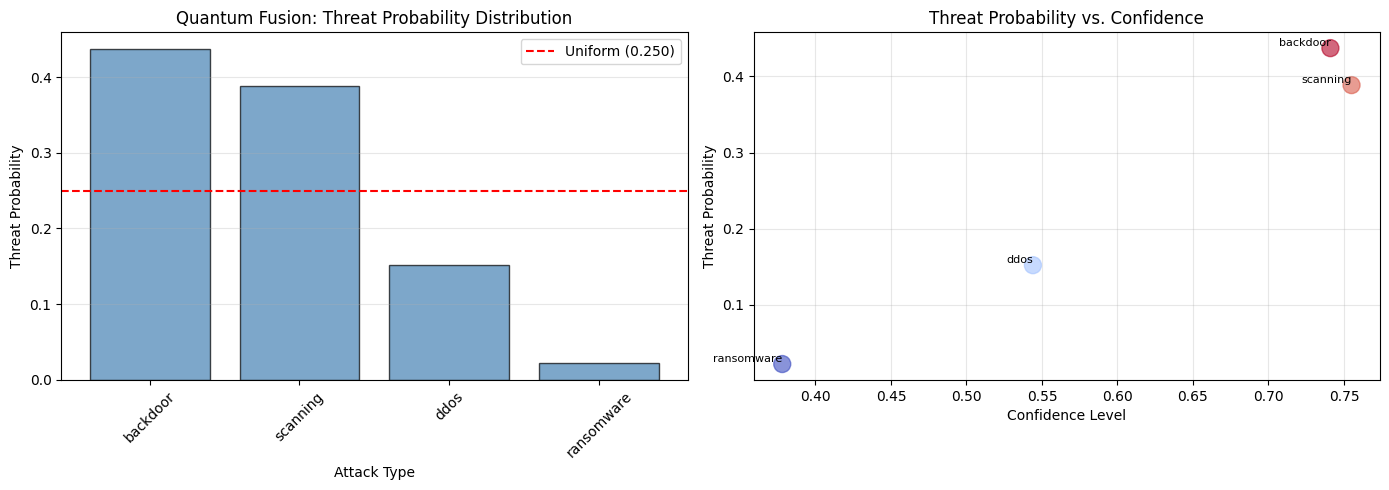

✅ Visualization complete


In [19]:
# Extract data for visualization
attack_types = [t.attack_type for t in sorted(threats.values(), key=lambda x: x.probability, reverse=True)]
probabilities = [threats[at].probability for at in attack_types]
confidences = [threats[at].confidence for at in attack_types]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart: Threat probabilities
axes[0].bar(attack_types, probabilities, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Attack Type')
axes[0].set_ylabel('Threat Probability')
axes[0].set_title('Quantum Fusion: Threat Probability Distribution')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(1.0 / len(threats), color='red', linestyle='--', 
                label=f'Uniform ({1.0/len(threats):.3f})')
axes[0].legend()

# Scatter: Probability vs. Confidence
axes[1].scatter(confidences, probabilities, s=150, alpha=0.6, c=probabilities, cmap='coolwarm')
for i, at in enumerate(attack_types):
    axes[1].annotate(at, (confidences[i], probabilities[i]), 
                     fontsize=8, ha='right', va='bottom')
axes[1].set_xlabel('Confidence Level')
axes[1].set_ylabel('Threat Probability')
axes[1].set_title('Threat Probability vs. Confidence')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualization complete")

---

## 🔗 Integration Example: End-to-End

Demo: FlowRecords → Evidence → Quantum Fusion

In [20]:
print("\n" + "="*80)
print("INTEGRATION: Phase-3.1 → 3.2 → 3.3 → 3.4")
print("="*80)

# Step 1: Create flows with retrieval results (Phase-3.1 + 3.2)
integration_flows = []

for i in range(15):
    flow_id = f"flow_{i:03d}"
    timestamp = 1000.0 + i * 5.0
    vector = np.random.rand(99).astype(np.float32)
    
    # Simulate retrieval results (Phase-3.2)
    retrieval_results = []
    
    # Backdoor: common, moderate similarity
    if i % 2 == 0:
        for _ in range(3):
            retrieval_results.append({
                'similarity': np.random.uniform(0.65, 0.80),
                'distance': np.random.uniform(0.25, 0.54),
                'attack_type': 'backdoor',
                'label': 'Attack',
                'metadata': {}
            })
    
    # DDoS: less common, high similarity
    if i % 4 == 0:
        for _ in range(2):
            retrieval_results.append({
                'similarity': np.random.uniform(0.80, 0.92),
                'distance': np.random.uniform(0.09, 0.25),
                'attack_type': 'ddos',
                'label': 'Attack',
                'metadata': {}
            })
    
    flow = FlowRecord(
        flow_id=flow_id,
        timestamp=timestamp,
        vector_embedding=vector,
        retrieval_results=retrieval_results,
        metadata={}
    )
    
    integration_flows.append(flow)

print(f"✓ Step 1: Created {len(integration_flows)} FlowRecords with retrieval results")

# Step 2: Accumulate evidence (Phase-3.3)
evidence = accumulate_evidence(integration_flows, min_similarity_threshold=0.0)
print(f"✓ Step 2: Accumulated evidence for {len(evidence)} attack types")

# Step 3: Quantum fusion (Phase-3.4)
threats = quantum_fusion(evidence, min_evidence_threshold=1)
print(f"✓ Step 3: Generated {len(threats)} threat hypotheses")

print_threat_summary(threats, top_k=5)

print("\n✅ INTEGRATION COMPLETE: Full pipeline working")


INTEGRATION: Phase-3.1 → 3.2 → 3.3 → 3.4
✓ Step 1: Created 15 FlowRecords with retrieval results
✓ Step 2: Accumulated evidence for 2 attack types
✓ Step 3: Generated 2 threat hypotheses

QUANTUM FUSION: THREAT PROBABILITIES (Top 2)
System Entropy: 0.6454 bits (max: 1.0000)
Entropy Ratio:  64.54%
Interpretation: 🟡 MODERATE CONFUSION (Mixed threat signals)
------------------------------------------------------------------------------------------
Rank   Attack Type          Probability    Confidence   Evidence   Recurrence  
------------------------------------------------------------------------------------------
1      backdoor             83.53%         73.36%       24         53.33%      
2      ddos                 16.47%         48.72%       8          26.67%      
Total probability (should be 1.0): 1.000000
Number of threat hypotheses: 2

✅ INTEGRATION COMPLETE: Full pipeline working


---

## ✅ Phase-3.4 Implementation Complete!

### 🎯 Deliverables
- `quantum_fusion()` ✅
- `compute_confidence()` ✅
- `print_threat_summary()` ✅
- Quantum-inspired amplitude normalization ✅
- Probability measurement (amplitude²) ✅
- Confidence scoring ✅

### 📊 Key Features
- **Amplitudes**: sqrt(count × avg_similarity × recurrence)
- **Normalization**: sum(amplitude²) = 1.0 (Born rule)
- **Measurement**: probability = amplitude²
- **No real quantum libraries**: Pure mathematical mapping
- **Deterministic**: Same input always produces same output
- **Explainable**: Clear formula and reasoning

### 🚀 Ready for Phase-3.5
Decision logic to convert probabilities → binary threat decisions

---